# Binomial Tests

## Introduction

In this assignment, we will explore the simplest kind of statistical test, tests where the distribution of data under a null hypothesis is binomial.  More sophisticated tests, like the z-tests (which use the normal distribution) and the t-tests (which use a generalization of the normal distribution called the t-distribution) can be viewed as elaborations on the themes set down here.

## Basic

### Part 1: Binomially Distributed Data

Recall the binomial distribution describes data generated when we observe a binary outcome (one of two things can happen) a fixed number of times, and the probability that one or another thing happens for each individual outcome does not change.

In each of the following situations, the resulting data *may be* binomially distributed.

  - If it is binomially distributed, give the parameters of the binomial distribution.
  - If it is not binomially distributed, describe why not.  If you can, give the correct distribution (if not, don't worry too much about it).

1. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground (without losing any) and count how many 4's you see.

2. A large bucket contains 1256 dice with varying numbers of sides (some have four sides, some have six, some have 8, some have 10, some have 12, and some have 20).  You dump them all onto the ground (without losing any) and count how many 4's you see.

3.  A magic the gathering deck (like a deck of cards) is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, then draw the top card and see if it is a land.  You repeat this process 100 times, and count how often there is a land on top.

4.  A magic the gathering deck is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, draw a hand of 7 cards, and count the number of lands.

#### The following two I'm gonna tell you up front: these ARE binomially distributed!  Convince yourself this is true, and compute the appropriate values of the parameters.

5. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground, but this time you lose a random number of dice; there is a 10% chance you will lose any individual die.  You, again, count the number of 4's. 

6.  A magic the gathering deck is made up of two types of cards: lands, and playables.  Although 17 lands is typical in a 40 card deck, it is sometimes correct to play 16 or 18 lands.  Say when you construct a deck, 80% of them contain 17 lands, 10% contain 16, and 10% contain 18.  You build a magic the gathering deck, shuffle it, and then look at the top card and see if it is a land.  You then repeat this process 100 times (including rebuilding the deck), and count how many times there was a land on top.



In [48]:
import scipy.stats as stats
import random
import numpy as np

def bucket_gen(n, all_dice = False):
    '''
    
    Parameters:
    ___________
    n 
    '''
    bucket = []
    if all_dice:
        for _ in range(n):
            dice_type = [4, 6, 8, 10, 12, 20]
            num_sides = random.choice(dice_type)
            bucket.append(num_sides)
    else:
        for _ in range(n):
            bucket.append(6)
            
    results = dict()
    
    for dice in bucket:
        roll = roll_dice(dice)
        if roll not in results:
            results[roll] = 1
        else:
            results[roll] += 1
            
    return results #, results.values().sum()
    


def roll_dice(side_num):
    return random.randint(1, side_num)
    

# 1. bucket to hold dice (1256) create dice 2. create dice(num_sides) 3. roll(num_sides)


n, p = 1256, 1/6

dist = stats.binom(n, p)
dist.pmf(4)
#print(dist.pmf(4))

5.836408453657285e-92

In [49]:
# rolls, val = bucket_gen(n)
print(bucket_gen(n, True))

{3: 181, 9: 43, 8: 58, 2: 185, 1: 161, 5: 93, 15: 10, 12: 21, 7: 72, 6: 129, 4: 169, 11: 37, 10: 45, 17: 3, 20: 9, 16: 9, 14: 7, 13: 8, 18: 6, 19: 10}


3.  A magic the gathering deck (like a deck of cards) is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, then draw the top card and see if it is a land.  You repeat this process 100 times, and count how often there is a land on top.

In [82]:
# n = 100
# land = 17
# deck = 40
# p = land / deck

def make_deck():
    # L, ['land'] * 17
    L = ['land'] * 17 + ['playable'] * 23
#     print(L)
    return L



def shuffle_deck(deck):
#     shuffled = []
    random.shuffle(deck)
#     shuffled =
    return deck

def draw_card(deck):
    return deck.pop()



# mtg_bi = stats.binom(n, p)

In [83]:
deck = make_deck()

In [92]:
shuffled = shuffle_deck(deck)

In [93]:
draw_card(shuffled)

'land'

In [97]:
top_card = []
for card in range(100):
    deck = make_deck()
    shuffled = shuffle_deck(deck)
    top_card.append(draw_card(shuffled))

# top_card

In [98]:
top_card.count('land')

46

In [99]:
top_card.count('playable')

54

In [105]:
# binom values
# k unknown
p = 17/40
n = 100

dist = stats.binom(n, p)
dist.pmf(43)

0.07996584476687427

A magic the gathering deck is made up of two types of cards: lands, and playables. You have a forty card deck that contains the typical 17 lands. You shuffle your deck, draw a hand of 7 cards, and count the number of lands.

In [110]:
def draw_hand(num_of_cards, deck):
    hand = []
    for _ in range(num_of_cards):
      hand.append(draw_card(deck))
        
    return hand

In [111]:
deck = make_deck()
shuffle = shuffle_deck(deck)
hand = draw_hand(7, shuffled)
hand

['land', 'land', 'playable', 'land', 'land', 'playable', 'land']

In [ ]:
# not binom b/c source probablity is changed when popping hand

#### The following two I'm gonna tell you up front: these ARE binomially distributed!  Convince yourself this is true, and compute the appropriate values of the parameters.

5. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground, but this time you lose a random number of dice; there is a 10% chance you will lose any individual die.  You, again, count the number of 4's. 

6.  A magic the gathering deck is made up of two types of cards: lands, and playables.  Although 17 lands is typical in a 40 card deck, it is sometimes correct to play 16 or 18 lands.  Say when you construct a deck, 80% of them contain 17 lands, 10% contain 16, and 10% contain 18.  You build a magic the gathering deck, shuffle it, and then look at the top card and see if it is a land.  You then repeat this process 100 times (including rebuilding the deck), and count how many times there was a land on top.

### Part 2: Binomial Hypothesis Tests

In each of the following situations, a decision can be made by using a hypothesis test based on the binomial distribution.  For each scenario:

  - State the null and alternate hypothesis.
  - State the distribution of the count under the null hypothesis (which, in every scenario, is a binomial distribution).
  - Plot the null binomial distribution, and shade the region to the right of the count you actually observed.
  - Calculate the p-value associated with the stated null and alternate hypothesis.
  - Decide whether to reject the null hypothesis.

1. Muriel still insists she can tell if you poured milk into tea before or after the hot water.  To prove her point, she goes to goodwill and purchases ALL of their mugs, 137 in total.  It take all day, but you manage to randomly make cups of tea milk or water first in all the mugs, without telling her how many there are of each, and test her on all of them.  She gets 72 correct.  Do you believe her now?

2. You are working on your heelflips (a skateboarding trick).  Your goal is to land them more than 50% of the time (as in, the true rate you land them is over one half.  Of course, in any given sample, you may learn more or less than that ideal).   You attempt 122 heelflips in a day, and land 72 of them.  Do you believe you are as good as you want to be?

3. Buses are seemingly always late, like 90% of them.  Thoroughly dismayed with the state of public transportation, you spend all day collecting data and being just generally upset.  Out of 53 total bus arrivals in a given day at your local bus stop, 49 of them were late.  Is the situation really that bad, 90% of them?

4. You'd like to think that you are improving at programming, but most of your programs don't run at first.  Your instructors insist that this is normal, but it's discouraging, so you would like to have some measure of improvement.  At the beginning, none of your programs ran the first time, but this week you wrote 6 programs, and one of them ran the first time!  Can you confidently clam that more than 5% of your programs run the first time, you'd feel pretty good about that.

In [149]:
#1
n = 137
p_muriel = 71 / n
# H_a: 
# H_0: P( |H_0) = 


In [150]:
# pvalue (observed:hypothesis) = n = 137 k = 72, nCk * 0.5^(72)*0.5(65)

In [151]:
print(n, p_muriel)

137 0.5182481751824818


In [180]:
dist1 = stats.binom.cdf(71, n, 0.5)
dist1_graph = stats.binom(n, 0.5)

In [181]:
print(1 - dist1)

0.30419205344997946


In [165]:
import matplotlib.pyplot as plt

In [176]:
def plot_binom(binomial):
    fig, ax = plt.subplots()
    
    bars = ax.bar(range(n+1), [binomial.pmf(i) for i in range(n+1)], align='center', color='grey')
    ax.set_xlim(50, 90)
    
    for i in range(72, n+1):
        bars[i].set_color('red')    
    

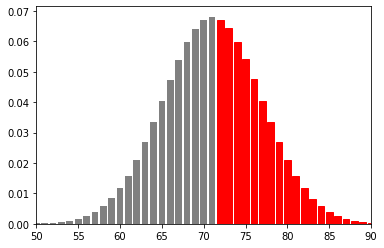

In [177]:
plot_binom(dist1_graph)

2. You are working on your heelflips (a skateboarding trick).  Your goal is to land them more than 50% of the time (as in, the true rate you land them is over one half.  Of course, in any given sample, you may learn more or less than that ideal).   You attempt 122 heelflips in a day, and land 72 of them.  Do you believe you are as good as you want to be?

In [178]:
# X ~ binomial(landed heelflips or not)
# H_a: P(X = 1) >50
# H_0: P(X = 1 | H_0) = .50
n_2, p_2 = 122, 72/122
dist2 = stats.binom(n_2, p_2)
print(1 - dist2.cdf(71))

0.5388296646450965


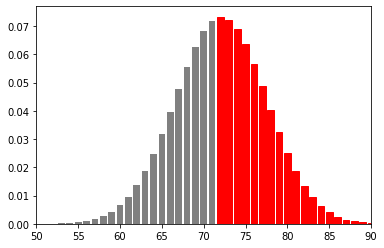

In [179]:
plot_binom(dist2)

3. Buses are seemingly always late, like 90% of them. Thoroughly dismayed with the state of public transportation, you spend all day collecting data and being just generally upset. Out of 53 total bus arrivals in a given day at your local bus stop, 49 of them were late. Is the situation really that bad, 90% of them?

In [ ]:
# X ~ binomial(buses late or not)
# H_a: p < 0.90; less than 90% of the time busses are late
# H_0: p = 0.90; 90% of the busses arrive late

